# Katherine's Notebook

In [1]:
import pandas as pd                     
import matplotlib.pyplot as plt      
import numpy as np        
import pandas
import matplotlib as plt
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import csv

mypath="../resources/raw/Aqi_cbsa"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [2]:
import matplotlib as mpl
mpl.style.use('seaborn-darkgrid')

In [3]:
print(len(onlyfiles))
#onlyfiles

41


In [4]:
#create dataframe of list of files
dfs=[]
for file in onlyfiles: 
    try:
        dfs.append(pd.read_csv(mypath+"/"+file))
    except: 
        print(file)
len(dfs)

41

In [5]:
# name dfs[0]
df_initial=dfs[0]
merge_df=df_initial
#merge_df

In [6]:
#
print(merge_df.shape)
for df in dfs[1:]: 
    merge_df = pd.concat([merge_df, df])
print(merge_df.shape)

(539, 19)
(19823, 19)


In [7]:
merge_df
#note: SO2 =sulfur dioxide, CO=Carbon monoxide, NO2=Nitrogen Dioxide, Ozone=O3, 
#PM2.5=particulate matter smaller than 2.5micrometes, PM10=particulate mattersmaller than 10 micrometers
#https://www.epa.gov/outdoor-air-quality-data/about-air-data-reports

,CBSA,CBSA Code,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,"Adrian, MI",10300,1999,183,116,49,17,1,0,0,151,97,44,0,0,183,0,0,0
1,"Aguadilla-Isabela, PR",10380,1999,55,50,5,0,0,0,0,64,49,24,0,0,0,0,55,0
2,"Akron, OH",10420,1999,365,72,191,85,16,1,0,208,131,74,0,0,87,115,162,1
3,"Alamogordo, NM",10460,1999,52,51,0,0,1,0,0,175,29,13,0,0,0,0,0,52
4,"Albany, GA",10500,1999,104,35,66,3,0,0,0,111,91,59,0,0,0,0,90,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,"Yakima, WA",49420,1983,225,142,81,2,0,0,0,118,79,41,225,0,0,0,0,0
323,"York-Hanover, PA",49620,1983,359,199,103,29,23,5,0,217,129,49,0,184,121,54,0,0
324,"Youngstown-Warren-Boardman, OH-PA",49660,1983,365,137,156,51,19,2,0,218,123,62,21,71,99,174,0,0
325,"Yuba City, CA",49700,1983,184,87,66,26,4,1,0,203,108,58,0,0,184,0,0,0


In [11]:
#number of rows for each year
merge_year_count=merge_df["Year"].value_counts().sort_index()

In [12]:
file="../resources/raw/cities_list.csv"
cities=pd.read_csv(file) 
#drop duplicates
cities=cities.drop_duplicates(subset=['City'])
#make cities df into a list
cities_list=cities["City"].tolist()
len(cities_list)

75

In [13]:
#split CBSA into City, ST
merge_df[['City','ST']]=merge_df['CBSA'].str.split(',',expand=True)
#merge_df

In [14]:
city_merge=merge_df[merge_df['City'].isin(cities_list)]

In [15]:
#year count 
city_merge_yr_count=city_merge["Year"].value_counts().sort_index()

In [16]:
#sort by year
city_merge=city_merge.sort_values(by=['Year'])
#city_merge

In [17]:
type(city_merge)

pandas.core.frame.DataFrame

In [18]:
city_merge.to_csv(r'../resources/clean/city_air_days', index = False)


#groupby YEAR 

In [57]:
#groupby YEAR to get averages
#avg count of days in good, mod, unhealthy, very unhealhy and hazardous
days_avg_byyear=city_merge.groupby("Year")[["Good Days","Moderate Days","Unhealthy Days",
                                        "Very Unhealthy Days","Hazardous Days"]].mean()
#groupby year to get avg max AQI
aqi_byyear=city_merge.groupby("Year")[["Max AQI", "90th Percentile AQI", "Median AQI"]].mean()
#avg count of days air pollutants year
air_pol_avg_yr=city_merge.groupby("Year")[["Days Ozone", "Days CO", "Days NO2", "Days SO2"]].mean()
#avg count of days air particulate matter 
air_pm=city_merge.groupby("Year")[["Days PM2.5","Days PM10"]].mean()
#drop Very unhealthy days and hazardous days
days_avg_byyear=days_avg_byyear[["Good Days","Moderate Days", "Unhealthy Days"]]
# Rename colums to averages 
days_avg_byyear=days_avg_byyear.rename(columns={"Good Days": "Average Good Days", "Moderate Days": "Average Moderate Days", "Unhealthy Days":"Average Unhealthy Days"})
#drop 2020
days_avg_byyear=pd.DataFrame(days_avg_byyear)
days_avg_byyear=days_avg_byyear.drop(2020)


In [90]:
air_pm_before2020=air_pm.drop(2020)
air_pm_after2000=air_pm_before2020.drop(air_pm_before2020.index[1:20])
air_pm_after2000

,Days PM2.5,Days PM10
Year,,
1980,0.000000,0.000000
2000,91.000000,16.878788
2001,90.272727,20.575758
2002,105.939394,10.242424
2003,106.696970,11.757576
2004,126.090909,11.484848
2005,124.727273,11.909091
2006,120.393939,12.333333
2007,142.281250,7.281250


In [91]:
air_pm_after2000=air_pm_after2000.drop(air_pm_after2000.index[0])

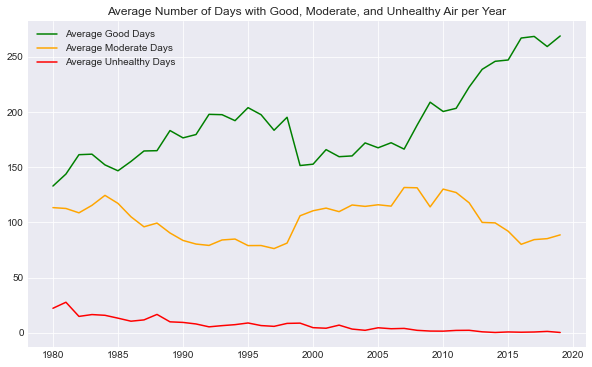

In [92]:
x=days_avg_byyear.index
fig, ax = plt.subplots(figsize = (10,6))
avg_good=plt.plot(x, days_avg_byyear["Average Good Days"], color='green')
avg_mod=plt.plot(x, days_avg_byyear["Average Moderate Days"], color='orange')
avg_unhe=plt.plot(x, days_avg_byyear["Average Unhealthy Days"], color='red')
plt.legend(['Average Good Days', 'Average Moderate Days', 'Average Unhealthy Days'], loc="best")
plt.title('Average Number of Days with Good, Moderate, and Unhealthy Air per Year')
plt.show()
fig.savefig(graph_path + 'avg_days_GMU.png')

In [93]:
graph_path=("../Graphs/Kat_graphs/")

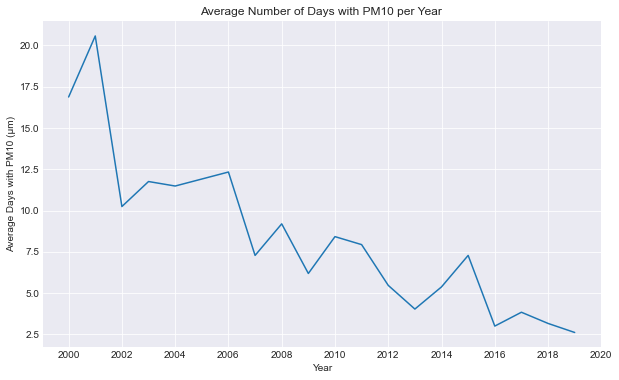

In [95]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
#plot 
fig, ax = plt.subplots(figsize = (10,6))
plt.plot(air_pm_after2000.index , air_pm_after2000["Days PM10"])
plt.xlabel("Year")
plt.ylabel("Average Days with PM10 (μm)")
ticks=plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020])
plt.title('Average Number of Days with PM10 per Year ')
plt.show()
fig.savefig(graph_path + 'avg_days_PM10.png')

In [ ]:
#ditch 2020 if doing trend line, leave in for visual
#create line plot for AVG MAX AQI by YEAR
fig, ax = plt.subplots(figsize = (10,6))
ax = plt.plot(aqi_byyear.index, aqi_byyear["Max AQI"])
#https://www.airnow.gov/aqi/aqi-basics/
plt.xlabel("Year")
plt.ylabel("Average Max AQI ")
plt.title('Avgerage Max AQI per Year')
plt.show()
fig.savefig(graph_path + 'avg_AQI.png')

## Groupby Year and  City,ST  

In [63]:


#groupby year to get averages of days 
days_avg_yr_city=city_merge.groupby(['Year','City','ST'], as_index=False)[["Good Days","Moderate Days","Unhealthy Days",
                                        "Very Unhealthy Days","Hazardous Days"]].mean()
#groupby year to get avg max AQI
aqi_yr_city=city_merge.groupby(['Year','City','ST'], as_index=False)[["Max AQI", "90th Percentile AQI", "Median AQI"]].mean()
#avg count of days air pollutants year
pol_yr_city=city_merge.groupby(['Year','City','ST'], as_index=False)[["Days Ozone", "Days CO", "Days NO2", "Days SO2"]].mean()
#avg count of days air particulate matter 
pm_yr_city=city_merge.groupby(['Year','City','ST'], as_index=False)[["Days PM2.5","Days PM10"]].mean()
days_avg_yr_city["City, ST"] = days_avg_yr_city[['City', 'ST']].agg(','.join, axis=1)
days_avg_yr_city=days_avg_yr_city[["Year","City, ST", "Good Days", "Moderate Days", "Unhealthy Days"]]
#rename average days by year and city,ST
days_avg_yr_city=days_avg_yr_city.rename(columns={"Good Days": "Average Good Days", "Moderate Days": "Average Moderate Days", "Unheathy Days":"Average Unhealthy Days"})
days_avg_yr_city=pd.DataFrame(days_avg_yr_city)
days_avg_yr_city_drop2020= days_avg_yr_city[days_avg_yr_city.Year!= 2020]



In [64]:
#Data frame of Top 5 improved: Syracuse, NY, Rochester NY, Medford OH, knoxville, TN, Tulsa OK
syracuse_data=days_avg_yr_city_drop2020.loc[days_avg_yr_city_drop2020['City, ST'] == 'Syracuse, NY']
syracuse_data=syracuse_data.set_index('Year')
rochester_ny=days_avg_yr_city_drop2020.loc[days_avg_yr_city_drop2020['City, ST'] == 'Rochester, NY']
rochester_ny=rochester_ny.set_index('Year')
medford_data=days_avg_yr_city_drop2020.loc[days_avg_yr_city_drop2020['City, ST'] == 'Medford, OR']
medford_data=medford_data.set_index('Year')
knoxville_data=days_avg_yr_city_drop2020.loc[days_avg_yr_city_drop2020['City, ST'] == 'Knoxville, TN']
knoxville_data=knoxville_data.set_index('Year')
tulsa=days_avg_yr_city_drop2020.loc[days_avg_yr_city_drop2020['City, ST'] == 'Tulsa, OK']
tulsa=tulsa.set_index('Year')
#concat
top_5_concat=pd.concat([syracuse_data,rochester_ny,medford_data,knoxville_data,tulsa ])
top_5_concat.head()

,"City, ST",Average Good Days,Average Moderate Days,Unhealthy Days
Year,,,,
1980,"Syracuse, NY",136,148,5
1981,"Syracuse, NY",159,134,5
1982,"Syracuse, NY",166,116,7
1983,"Syracuse, NY",183,117,3
1984,"Syracuse, NY",129,144,26


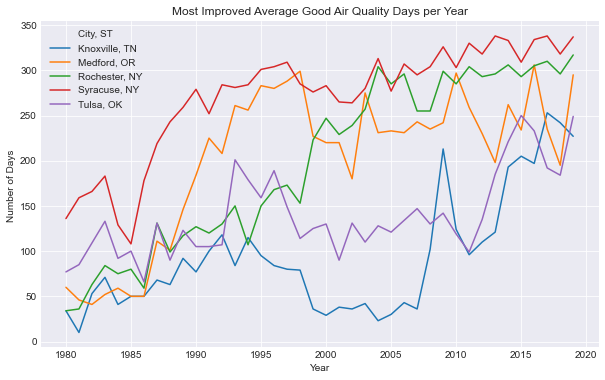

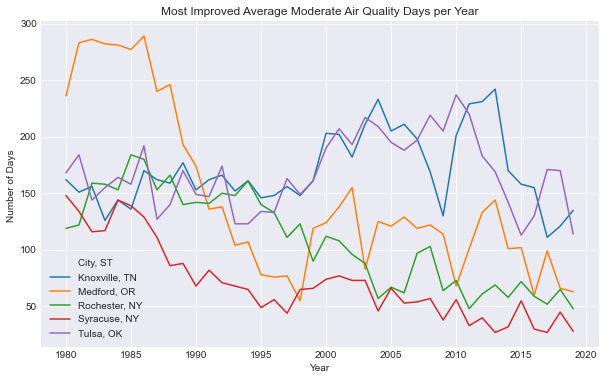

In [74]:
#avg good days for top 5
top_5_good=top_5_concat[['City, ST','Average Good Days']]
#plot with each city,st as different color
top_5_good=top_5_good.pivot(columns='City, ST', values='Average Good Days')
top_5_good.plot(figsize = (10,6))
plt.xlabel("Year")
plt.ylabel("Number of Days ")
plt.title('Most Improved Average Good Air Quality Days per Year')
plt.savefig(graph_path + 'Top_5_good.png')
#avg mod days for top 5
top_5_mod=top_5_concat[['City, ST','Average Moderate Days']]
#plot with each city,st as different color
top_5_mod=top_5_mod.pivot(columns='City, ST', values='Average Moderate Days')
top_5_mod.plot(figsize = (10,6))
plt.xlabel("Year")
plt.ylabel("Number of Days ")
plt.title('Most Improved Average Moderate Air Quality Days per Year')
#plt.legend(loc='upper center')
plt.savefig(graph_path + 'Top_5_mod.png')
#avg bad days for top 5


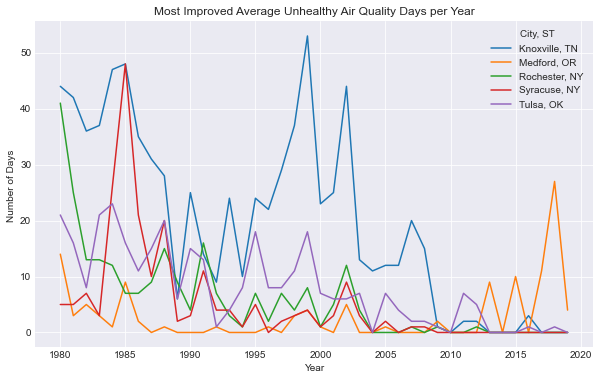

In [72]:
top_5_bad=top_5_concat[['City, ST','Unhealthy Days']]
#plot with each city,st as different color
top_5_bad=top_5_bad.pivot(columns='City, ST', values='Unhealthy Days')
top_5_bad.plot(figsize = (10,6))
plt.xlabel("Year")
plt.ylabel("Number of Days ")
plt.title('Most Improved Average Unhealthy Air Quality Days per Year')
plt.savefig(graph_path + 'Top_5_bad.png')


In [67]:
#data frame of 5 least improved: OKC, fort wayne IN, Santa Fe NM, alburquerque NM
OKC=days_avg_yr_city_drop2020.loc[days_avg_yr_city_drop2020['City, ST'] == 'Oklahoma City, OK']
OKC=OKC.set_index('Year')
fort_wayne=days_avg_yr_city_drop2020.loc[days_avg_yr_city_drop2020['City, ST'] == 'Fort Wayne, IN']
fort_wayne=fort_wayne.set_index('Year')
SF_data=days_avg_yr_city_drop2020.loc[days_avg_yr_city_drop2020['City, ST'] == 'Santa Fe, NM']
SF_data=SF_data.set_index('Year')
albur_data=days_avg_yr_city_drop2020.loc[days_avg_yr_city_drop2020['City, ST'] == 'Albuquerque, NM']
albur_data=albur_data.set_index('Year')
baton_data=days_avg_yr_city_drop2020.loc[days_avg_yr_city_drop2020['City, ST'] == 'Baton Rouge, LA']
baton_data=baton_data.set_index('Year')
#Concat
less_5_concat=pd.concat([OKC,fort_wayne,SF_data,albur_data,baton_data ])
less_5_concat.head()

,"City, ST",Average Good Days,Average Moderate Days,Unhealthy Days
Year,,,,
1980,"Oklahoma City, OK",213,121,10
1981,"Oklahoma City, OK",187,148,8
1982,"Oklahoma City, OK",241,106,5
1983,"Oklahoma City, OK",221,110,5
1984,"Oklahoma City, OK",177,124,14


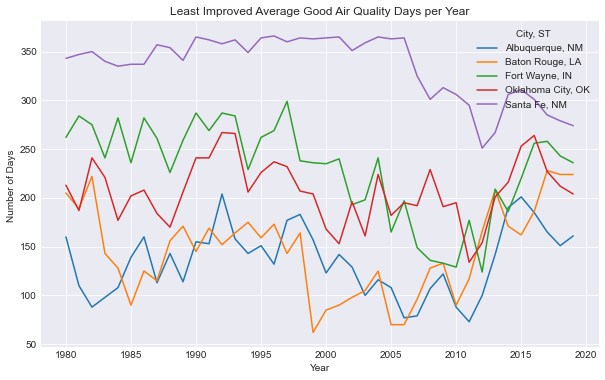

In [73]:
#avg good days for less 5 & plot with each city,st as different color
less_5_good=less_5_concat[['City, ST','Average Good Days']]
less_5_good=less_5_good.pivot(columns='City, ST', values='Average Good Days')
less_5_good.plot(figsize = (10,6))
plt.xlabel("Year")
plt.ylabel("Number of Days ")
plt.title('Least Improved Average Good Air Quality Days per Year')
plt.savefig(graph_path + 'less_5_good.png')

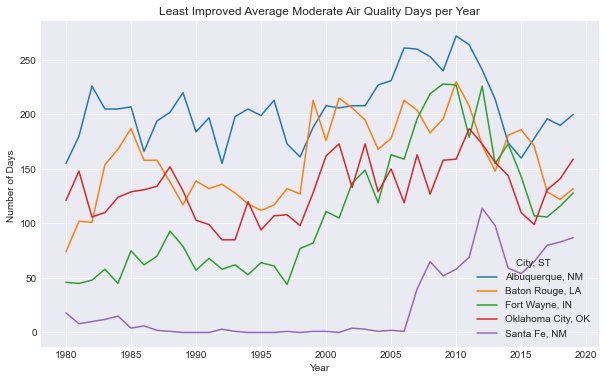

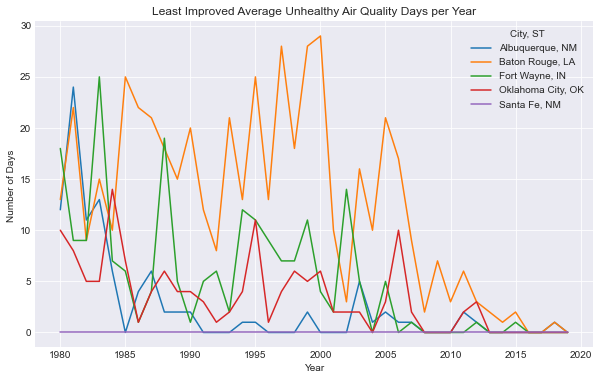

In [96]:

#avg mod days for less 5 & plot with each city,st as different color
            
less_5_mod=less_5_concat[['City, ST','Average Moderate Days']]
less_5_mod=less_5_mod.pivot(columns='City, ST', values='Average Moderate Days')
less_5_mod.plot(figsize = (10,6))
plt.xlabel("Year")
plt.ylabel("Number of Days ")
plt.title('Least Improved Average Moderate Air Quality Days per Year')   
plt.savefig(graph_path + 'less_5_mod.png')
plt.show()           
#avg bad days for less 5 & plot with each city,st as different color
less_5_bad=less_5_concat[['City, ST','Unhealthy Days']]
less_5_bad=less_5_bad.pivot(columns='City, ST', values='Unhealthy Days')
less_5_bad.plot(figsize = (10,6))
plt.xlabel("Year")
plt.ylabel("Number of Days ")
plt.title('Least Improved Average Unhealthy Air Quality Days per Year')
plt.savefig(graph_path + 'less_5_bad.png')
plt.show()

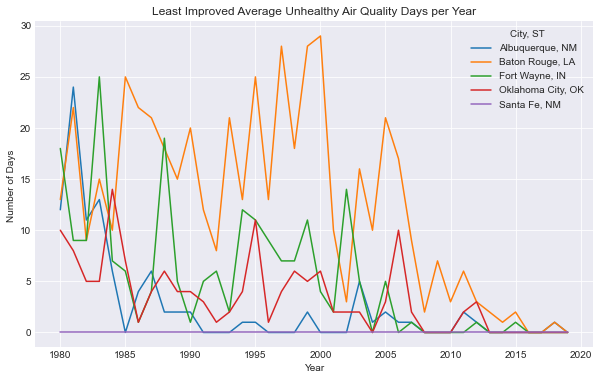

In [97]:
#avg bad days for less 5 & plot with each city,st as different color
less_5_bad=less_5_concat[['City, ST','Unhealthy Days']]
less_5_bad=less_5_bad.pivot(columns='City, ST', values='Unhealthy Days')
less_5_bad.plot(figsize = (10,6))
plt.xlabel("Year")
plt.ylabel("Number of Days ")
plt.title('Least Improved Average Unhealthy Air Quality Days per Year')
plt.savefig(graph_path + 'lelegend')
plt.show()